![enter image description here](https://img.shields.io/badge/Author-Nestor_Batista_Díaz-yellow)

# TAREA 1 Regresión lineal con Python

In [2]:
pyppeteer-install

NameError: name 'pyppeteer' is not defined

### 1) (4 Puntos) Modifica el código usando los datos del archivo adjunto y muestra los puntos junto con la recta de regresión usando el modelo de scikit-learn. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

| Restaurantes | X   | Y   | XY | 
| ------------ | --- | --- | -- | 
|      1       | 2   | 58  |    | 
|      2       | 6   | 105 |    | 
|      3       | 8   | 88  |    | 
|      4       | 8   | 118 |    | 
|      5       | 12  | 117 |    | 
|      6       | 16  | 137 |    | 
|      7       | 20  | 157 |    | 
|      8       | 20  | 169 |    | 
|      9       | 22  | 149 |    | 
|      10      | 26  | 202 |    | 

In [2]:
X = np.array([2, 6, 8, 8, 12, 16, 20, 20, 22, 26])
Y= np.array([58, 105, 88, 118, 117, 137, 157, 169, 149, 202])


In [3]:
X = X[:, np.newaxis]

In [4]:
# Split the data into training/testing sets
X_train = X[:-2]
X_test = X[-8:]

In [5]:
# Split the targets into training/testing sets
y_train = Y[:-2]
y_test = Y[-8:]

In [6]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [7]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [8]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [9]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [5.15]
Mean squared error: 151.54
Coefficient of determination: 0.86


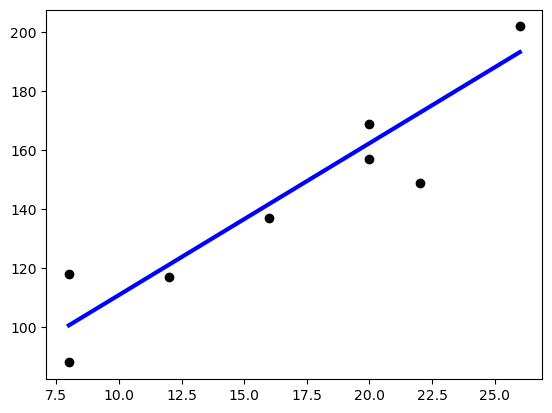

In [10]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.show()

### 2) (4 Puntos) Calcula la recta de regresión usando las fórmulas y dibújala con matplotlib:

In [11]:
# Datos de ejemplo
x = np.array([2, 6, 8, 8, 12, 16, 20, 20, 22, 26])
y= np.array([58, 105, 88, 118, 117, 137, 157, 169, 149, 202])

# Número de datos
n = len(x)


$ b_1 = \frac{{(\sum x_iy_i) - \frac{{(\sum x_i)(\sum y_i)}}{{n}}}}{{(\sum x_i^2) - \frac{{(\sum x_i)^2}}{{n}}}} =\frac{{n(\sum xy) - (\sum x)(\sum y)}}{{n(\sum x^2) - (\sum x)^2}} $


In [12]:
# Calcula los coeficientes de la regresión
b1 = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - (np.sum(x))**2)
print("b1 = ",  b1)

b1 =  5.0


$ b_0 = (\sum \bar y) - (b_1  \sum \bar x) =\frac{(\sum y)  -  (b_1  \sum x)}{n} $

In [13]:
b0 = (np.sum(y) - b1 * np.sum(x)) / n
print("b0 = ",  b0)

b0 =  60.0


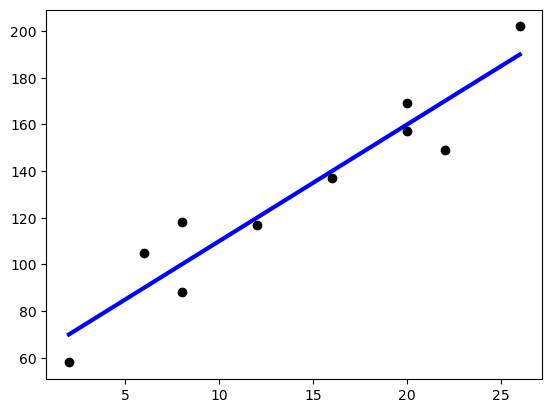

In [14]:
# Genera puntos para la línea de regresión
x_line = np.linspace(min(x), max(x), 100)
y_line = b0 + b1 * x_line

# Grafica los puntos y la línea de regresión
plt.scatter(x, y, color="black")
plt.plot(x_line, y_line, color="blue", linewidth=3)
plt.show()

### 3) (2 Puntos) Calcula los coeficientes de determinación r2 y r. 

$ \hat y = b_0 + b_1 x $

In [15]:
# Calcula los valores estimados
y_hat = b0 + b1 * x

print("y_hat = ", y_hat)

y_hat =  [ 70.  90. 100. 100. 120. 140. 160. 160. 170. 190.]


$ SCE = \sum (y_i - \hat y_i)^2 $

In [16]:
SCE = np.sum((y - y_hat)**2)

print("SCE = ", SCE)

SCE =  1530.0


$ SCT = \sum (y_i - \bar y_i)^2 $

In [17]:
# Coeficiente de determinación (r^2)
mean_y = np.mean(y) # np.sum(y)/n
SCT = np.sum((y - mean_y)**2)

print("SCT = ", SCT)

SCT =  15730.0


$ r^2 = 1 - \frac{SCE}{SCT} $

In [18]:
r_squared =  1 - (SCE / SCT)

print("Coeficiente de determinación (r_squared):", r_squared)

Coeficiente de determinación (r_squared): 0.9027336300063573


$ r = ($ Signo de $b_1 )  \sqrt r^2 $

In [19]:
# Coeficiente de correlación (r)
r =  np.sign(b1) * np.sqrt(r_squared)

print("Coeficiente de correlación (r):", r)

Coeficiente de correlación (r): 0.9501229552044079
